In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import igraph as ig
import os
import leidenalg
import matplotlib as mpl
import louvain

In [2]:
import anndata

/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_187826/2776462842.py:34: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(control1, resolu

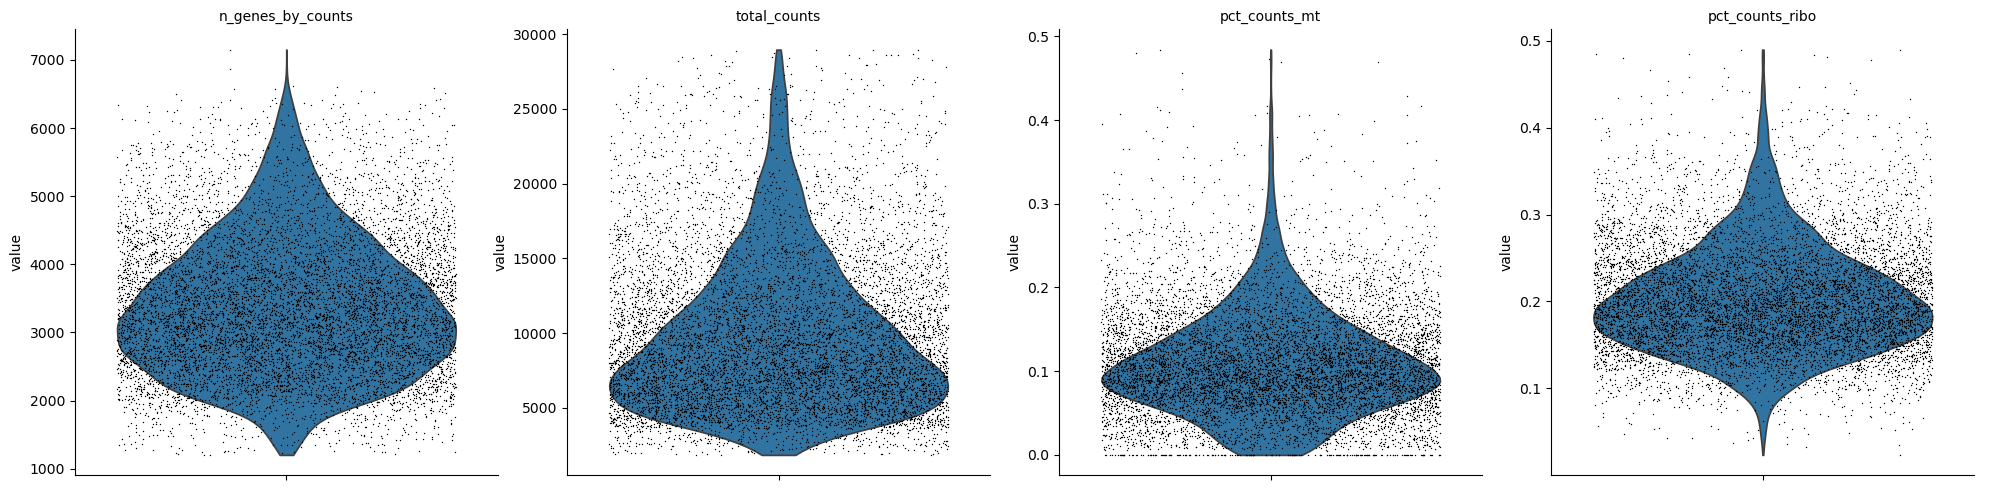

In [3]:
#control 1 with Zacks bounds
control1 = sc.read_10x_mtx("./CTRL_922_filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
        var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
        cache=True,  # write a cache file for faster subsequent reading
                       )
control1.var_names_make_unique()

    
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
control1.var["mt"] = control1.var_names.str.startswith("mt-")
# ribosomal genes
control1.var["ribo"] = control1.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(
control1, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)

#upper and lower limits
control1= control1[(control1.obs.n_genes_by_counts<7800) & (control1.obs.n_genes_by_counts> 1200)]
control1= control1[(control1.obs.total_counts<29000)]
control1 = control1[control1.obs.pct_counts_mt < .5]
control1 = control1[control1.obs.pct_counts_ribo < .5]
#control1 = control1[control1.obs.n_genes_by_counts < 2500, :]
#control1 = control1[control1.obs.pct_counts_mt < 5, :]
    
sc.pp.normalize_total(control1, target_sum=1e4) #normalize every cell to 10k UMI
sc.pp.log1p(control1)
sc.pp.highly_variable_genes(control1, min_mean=0.0125, max_mean=3, min_disp=0.5)
control1.raw = control1 #save raw values
control1 = control1[:,control1.var.highly_variable]
sc.pp.regress_out(control1, ['pct_counts_ribo', 'pct_counts_mt'])
sc.pp.scale(control1, max_value =10)
sc.tl.pca(control1,svd_solver = 'arpack')
sc.pp.neighbors(control1, n_neighbors=15, n_pcs =35)
sc.tl.leiden(control1, resolution =.8)
sc.tl.umap(control1)

sc.pl.violin(
    control1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)


/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


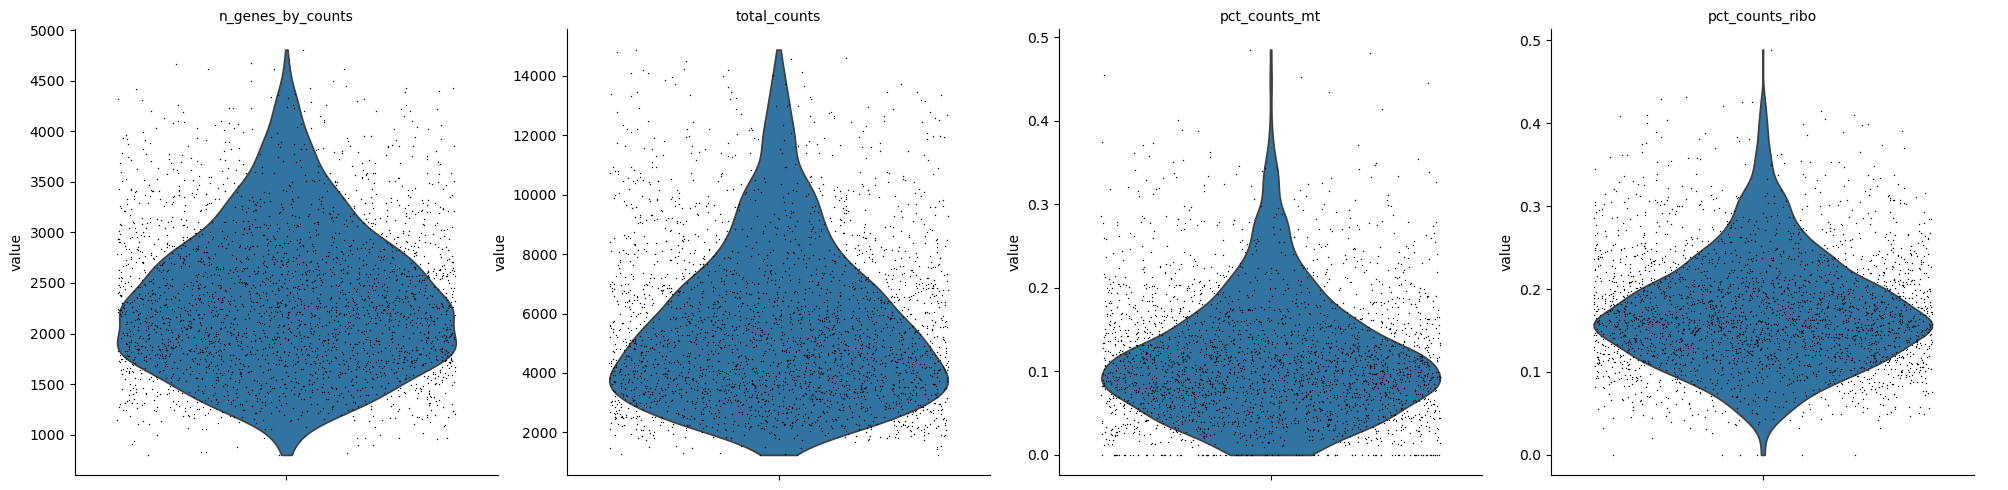

In [4]:
#control 2 with Zacks bounds
control2 = sc.read_10x_mtx("./CTRL_1123_filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
        var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
        cache=True,  # write a cache file for faster subsequent reading
                       )
control2.var_names_make_unique()

    
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
control2.var["mt"] = control2.var_names.str.startswith("mt-")
# ribosomal genes
control2.var["ribo"] = control2.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(
control2, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)

#upper and lower limits
control2= control2[(control2.obs.n_genes_by_counts<5000) & (control2.obs.n_genes_by_counts> 800)]
control2= control2[(control2.obs.total_counts<15000)]
control2 = control2[control2.obs.pct_counts_mt < .5]
control2 = control2[control2.obs.pct_counts_ribo < .5]
#control2 = control2[control2.obs.n_genes_by_counts < 2500, :]
#control2 = control2[control2.obs.pct_counts_mt < 5, :]
    
sc.pp.normalize_total(control2, target_sum=1e4) #normalize every cell to 10k UMI
sc.pp.log1p(control2)
sc.pp.highly_variable_genes(control2, min_mean=0.0125, max_mean=3, min_disp=0.5)
control2.raw = control2 #save raw values
control2 = control2[:,control2.var.highly_variable]
sc.pp.regress_out(control2, ['pct_counts_ribo', 'pct_counts_mt'])
sc.pp.scale(control2, max_value =10)
sc.tl.pca(control2,svd_solver = 'arpack')
sc.pp.neighbors(control2, n_neighbors=15, n_pcs =35)
sc.tl.leiden(control2, resolution =.8)
sc.tl.umap(control2)

sc.pl.violin(
    control2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)




/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


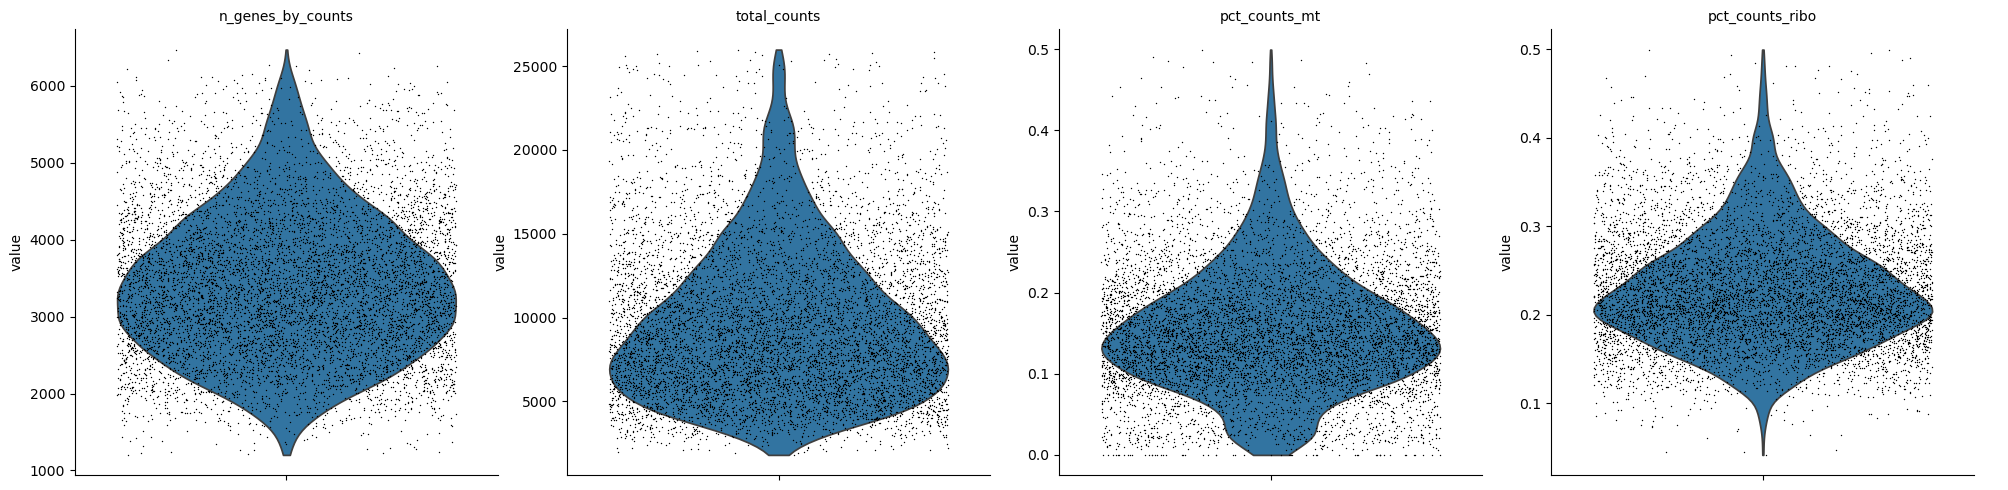

In [5]:
#lrrk2 1 with Zacks bounds
lrrk2_1 = sc.read_10x_mtx("./LRRK2_113_filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
        var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
        cache=True,  # write a cache file for faster subsequent reading
                       )
lrrk2_1.var_names_make_unique()

    
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
lrrk2_1.var["mt"] = lrrk2_1.var_names.str.startswith("mt-")
# ribosomal genes
lrrk2_1.var["ribo"] = lrrk2_1.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(
lrrk2_1, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)

#upper and lower limits
lrrk2_1= lrrk2_1[(lrrk2_1.obs.n_genes_by_counts<6500) & (lrrk2_1.obs.n_genes_by_counts> 1200)]
lrrk2_1= lrrk2_1[(lrrk2_1.obs.total_counts<26000)]
lrrk2_1 = lrrk2_1[lrrk2_1.obs.pct_counts_mt < .5]
lrrk2_1 = lrrk2_1[lrrk2_1.obs.pct_counts_ribo < .5]
#lrrk2_1 = lrrk2_1[lrrk2_1.obs.n_genes_by_counts < 2500, :]
#lrrk2_1 = lrrk2_1[lrrk2_1.obs.pct_counts_mt < 5, :]
    
sc.pp.normalize_total(lrrk2_1, target_sum=1e4) #normalize every cell to 10k UMI
sc.pp.log1p(lrrk2_1)
sc.pp.highly_variable_genes(lrrk2_1, min_mean=0.0125, max_mean=3, min_disp=0.5)
lrrk2_1.raw = lrrk2_1 #save raw values
lrrk2_1 = lrrk2_1[:,lrrk2_1.var.highly_variable]
sc.pp.regress_out(lrrk2_1, ['pct_counts_ribo', 'pct_counts_mt'])
sc.pp.scale(lrrk2_1, max_value =10)
sc.tl.pca(lrrk2_1,svd_solver = 'arpack')
sc.pp.neighbors(lrrk2_1, n_neighbors=15, n_pcs =35)
sc.tl.leiden(lrrk2_1, resolution =.8)
sc.tl.umap(lrrk2_1)

sc.pl.violin(
    lrrk2_1,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)



/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


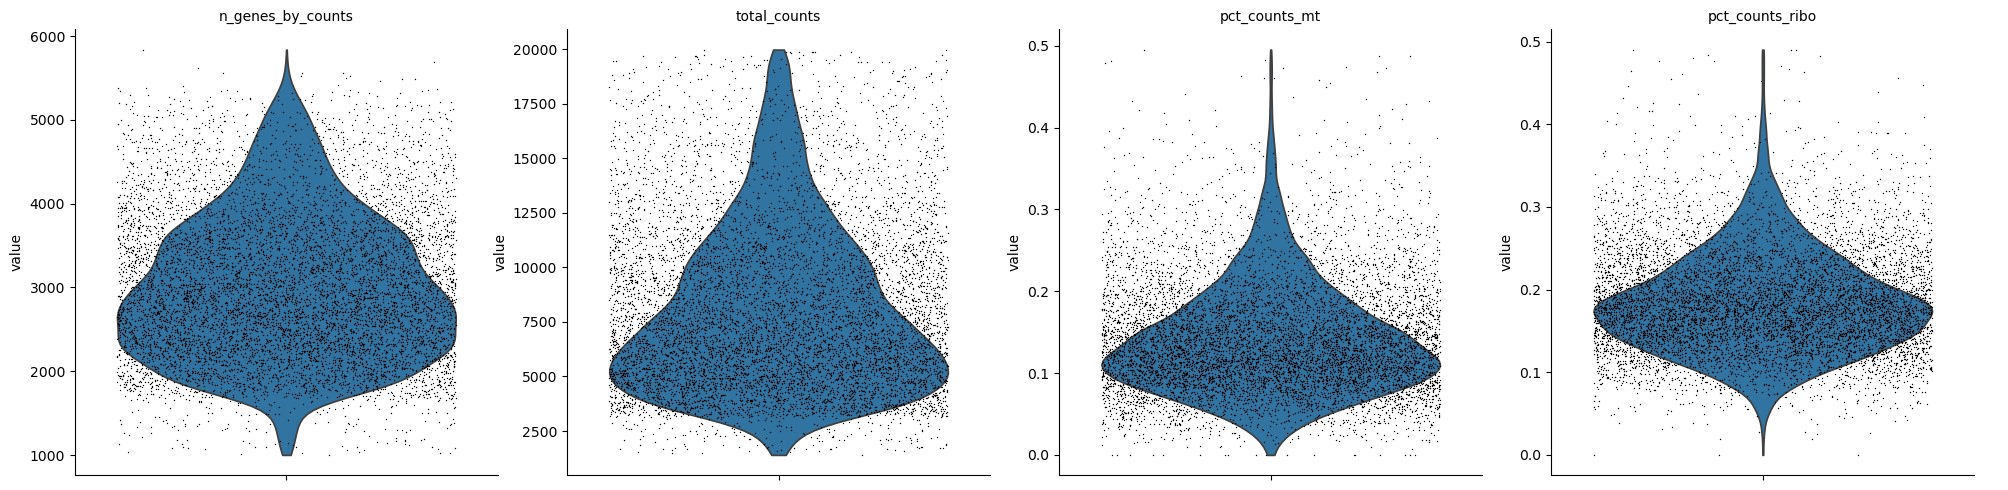

In [6]:
#lrrk2 2 with Zacks bounds
lrrk2_2 = sc.read_10x_mtx("./LRRK2_ 922_filtered_feature_bc_matrix/",  # the directory with the `.mtx` file
        var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
        cache=True,  # write a cache file for faster subsequent reading
                       )
lrrk2_2.var_names_make_unique()

    
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
lrrk2_2.var["mt"] = lrrk2_2.var_names.str.startswith("mt-")
# ribosomal genes
lrrk2_2.var["ribo"] = lrrk2_2.var_names.str.startswith(("Rps","Rpl"))
sc.pp.calculate_qc_metrics(
lrrk2_2, qc_vars=["mt", "ribo"], inplace=True, log1p=True
)

#upper and lower limits
lrrk2_2= lrrk2_2[(lrrk2_2.obs.n_genes_by_counts<7500) & (lrrk2_2.obs.n_genes_by_counts> 1000)]
lrrk2_2= lrrk2_2[(lrrk2_2.obs.total_counts<20000)]
lrrk2_2 = lrrk2_2[lrrk2_2.obs.pct_counts_mt < .5]
lrrk2_2 = lrrk2_2[lrrk2_2.obs.pct_counts_ribo < .5]
#lrrk2_2 = lrrk2_2[lrrk2_2.obs.n_genes_by_counts < 2500, :]
#lrrk2_2 = lrrk2_2[lrrk2_2.obs.pct_counts_mt < 5, :]
    
sc.pp.normalize_total(lrrk2_2, target_sum=1e4) #normalize every cell to 10k UMI
sc.pp.log1p(lrrk2_2)
sc.pp.highly_variable_genes(lrrk2_2, min_mean=0.0125, max_mean=3, min_disp=0.5)
lrrk2_2.raw = lrrk2_2 #save raw values
lrrk2_2 = lrrk2_2[:,lrrk2_2.var.highly_variable]
sc.pp.regress_out(lrrk2_2, ['pct_counts_ribo', 'pct_counts_mt'])
sc.pp.scale(lrrk2_2, max_value =10)
sc.tl.pca(lrrk2_2,svd_solver = 'arpack')
sc.pp.neighbors(lrrk2_2, n_neighbors=15, n_pcs =35)
sc.tl.leiden(lrrk2_2, resolution =.8)
sc.tl.umap(lrrk2_2)

sc.pl.violin(
    lrrk2_2,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"],
    jitter=0.4,
    multi_panel=True,
)



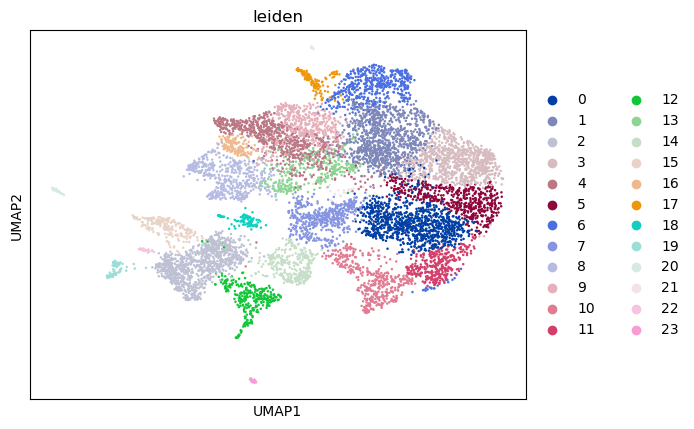

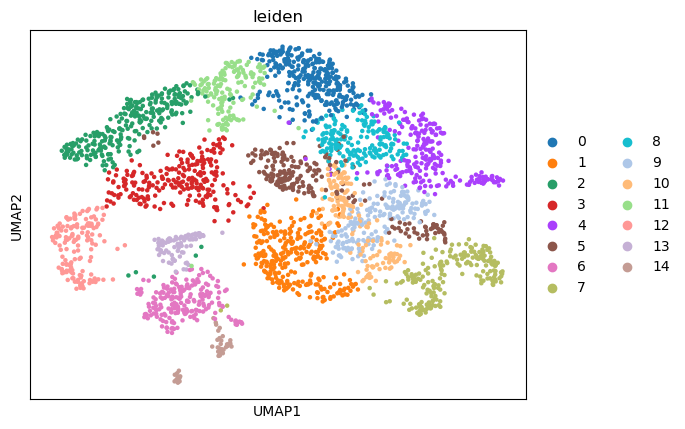

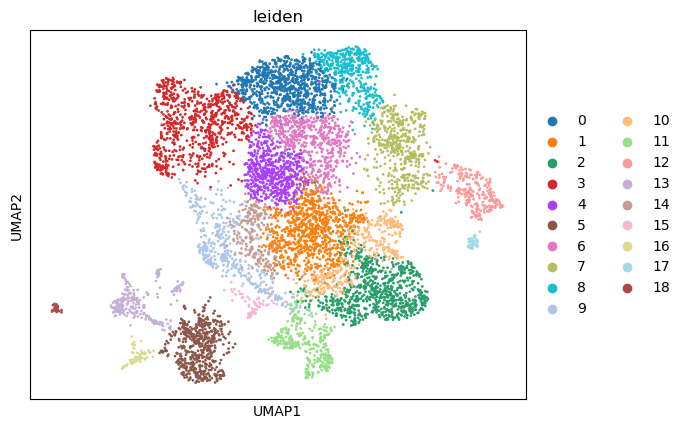

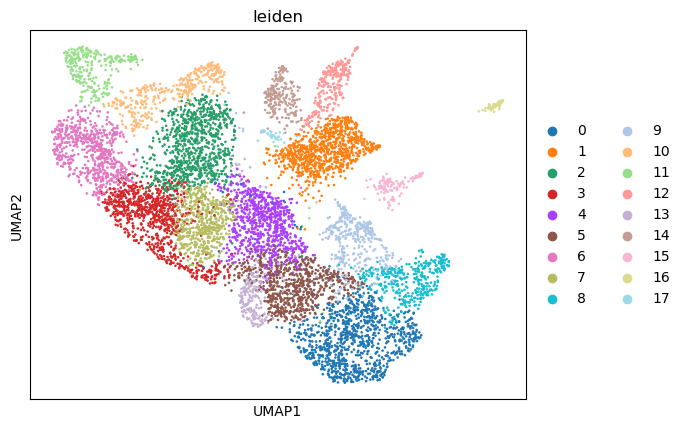

In [7]:
#UMAP plots
sc.pl.umap(control1, color = 'leiden')
sc.pl.umap(control2, color = 'leiden')
sc.pl.umap(lrrk2_1, color = 'leiden')
sc.pl.umap(lrrk2_2, color = 'leiden')



In [8]:
lrrk2_2.obs['Sample'] = 'lrrk2_2'
lrrk2_1.obs['Sample'] = 'lrrk2_1'
control2.obs['Sample'] = 'control2'
control1.obs['Sample'] = 'control1'

var_names = control1.var_names.intersection(lrrk2_1.var_names)
#intersect gene names
len(var_names) #tell you how many overlapping genes there are
control1 = control1[:,var_names]
lrrk2_1 = lrrk2_1[:,var_names]
sc.tl.ingest(lrrk2_1, control1, obs='leiden')
merged = control1.concatenate(lrrk2_1)

#add lrrk2
var_names = control1.var_names.intersection(lrrk2_2.var_names)
control1 = control1[:,var_names]
lrrk2_2 = lrrk2_2[:,var_names]
sc.tl.ingest(lrrk2_2, control1, obs='leiden')
merged = merged.concatenate(lrrk2_2)

#add control2
var_names = control1.var_names.intersection(control2.var_names)
control1 = control1[:,var_names]
control2 = control2[:,var_names]
sc.tl.ingest(control2, control1, obs='leiden')
merged = merged.concatenate(control2)

/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/_collections_abc.py:982: ImplicitModificationWarning: Setting element `.obsm['rep']` of view, initializing view as actual.
  self[key] = other[key]
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/_collections_abc.py:982: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  self[key] = other[key]
/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/_collections_abc.py:982: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  self[key] = other[key]
/tmp/ipykernel_187826/4030615828.py:12: FutureWarning: Use anndata.concat instead of AnnData.c

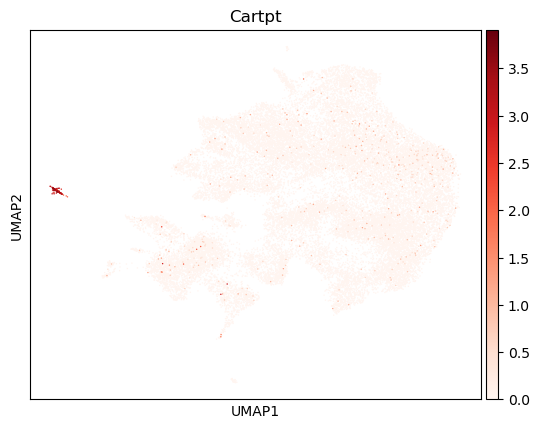

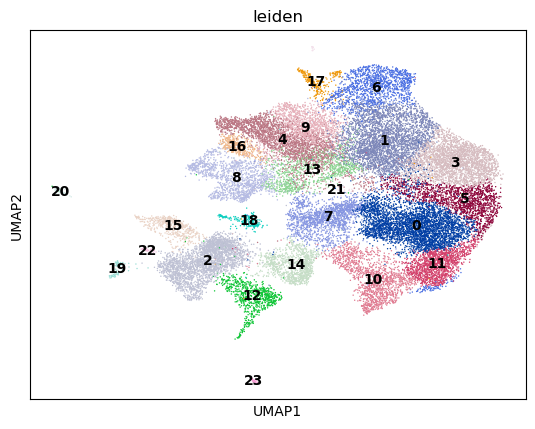

In [9]:
sc.pl.umap(merged, color="Cartpt",palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(merged, color = 'leiden',legend_loc="on data")#observe umaps

/home/ltf3917/.conda/envs/scanpyAS-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


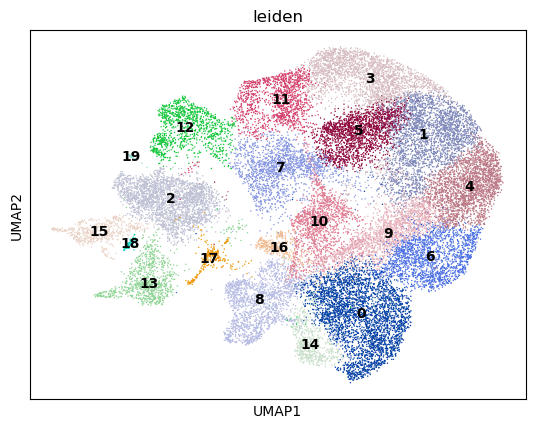

In [10]:
#remove EW nucleus cells
new_anndata = merged[~merged.obs['leiden'].isin(['20']),:]


sc.tl.pca(new_anndata,svd_solver = 'arpack')
sc.pp.neighbors(new_anndata, n_neighbors=15, n_pcs =32)
sc.tl.leiden(new_anndata, resolution =.8)
sc.tl.umap(new_anndata)
sc.pl.umap(new_anndata, color = 'leiden', legend_loc = "on data")

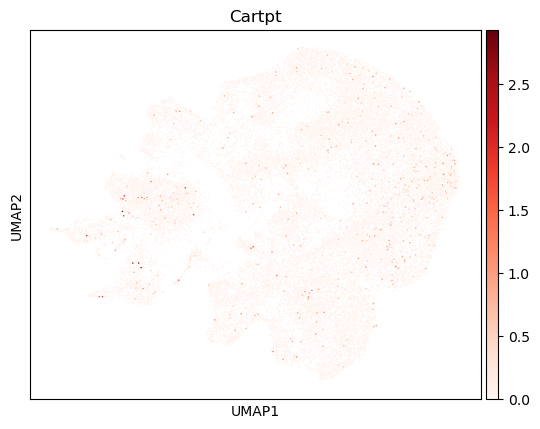

In [11]:
sc.pl.umap(new_anndata, color="Cartpt",palette="Set2", color_map=mpl.cm.Reds)
#looks good no EW cells

In [12]:
new_anndata#gives a view of the object
new_anndata.obs 

n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGACGAGCT-1-0-0-0               4191                 8.340933   
AAACCCAAGCCTTTCC-1-0-0-0               4903                 8.497806   
AAACCCACAAGGGTCA-1-0-0-0               4060                 8.309185   
AAACCCACATCCTGTC-1-0-0-0               3637                 8.199189   
AAACCCAGTAGGAGTC-1-0-0-0               3242                 8.084254   
...                                     ...                      ...   
TTTGGTTCACATTACG-1-1                   4423                 8.394800   
TTTGGTTCACGACAAG-1-1                   2138                 7.668094   
TTTGGTTTCTACTGAG-1-1                   1750                 7.467942   
TTTGTTGAGGCCCACT-1-1                   3635                 8.198639   
TTTGTTGTCGATGCTA-1-1                   2122                 7.660585   

                          total_counts  log1p_total_counts  \
AAACCCAAGACGAGCT-1-0-0-0       13537.0            9.513256   
AAACCCAAGCCTTTCC-1-0-0-0       19301.0            9.867964   
AAACCCACAAGGGTCA-1-0-0-0       11855.0            9.380589   
AAACCCACATCCTGTC-1-0-0-0        9752.0            9.185330   
AAACCCAGTAGGAGTC-1-0-0-0        7673.0            8.945593   
...                                ...                 ...   
TTTGGTTCACATTACG-1-1           14088.0            9.553149   
TTTGGTTCACGACAAG-1-1            4453.0            8.401558   
TTTGGTTTCTACTGAG-1-1            3684.0            8.212026   
TTTGTTGAGGCCCACT-1-1           12115.0            9.402282   
TTTGTTGTCGATGCTA-1-1            4456.0            8.402231   

                          pct_counts_in_top_50_genes  \
AAACCCAAGACGAGCT-1-0-0-0                   27.687080   
AAACCCAAGCCTTTCC-1-0-0-0                   28.231698   
AAACCCACAAGGGTCA-1-0-0-0                   23.644032   
AAACCCACATCCTGTC-1-0-0-0                   23.072190   
AAACCCAGTAGGAGTC-1-0-0-0                   21.243321   
...                                              ...   
TTTGGTTCACATTACG-1-1                       26.724872   
TTTGGTTCACGACAAG-1-1                       25.847743   
TTTGGTTTCTACTGAG-1-1                       28.501629   
TTTGTTGAGGCCCACT-1-1                       31.044160   
TTTGTTGTCGATGCTA-1-1                       25.583483   

                          pct_counts_in_top_100_genes  \
AAACCCAAGACGAGCT-1-0-0-0                    34.911723   
AAACCCAAGCCTTTCC-1-0-0-0                    36.138024   
AAACCCACAAGGGTCA-1-0-0-0                    30.906790   
AAACCCACATCCTGTC-1-0-0-0                    30.506563   
AAACCCAGTAGGAGTC-1-0-0-0                    28.085495   
...                                               ...   
TTTGGTTCACATTACG-1-1                        33.560477   
TTTGGTTCACGACAAG-1-1                        33.617786   
TTTGGTTTCTACTGAG-1-1                        37.106406   
TTTGTTGAGGCCCACT-1-1                        39.372678   
TTTGTTGTCGATGCTA-1-1                        33.078995   

                          pct_counts_in_top_200_genes  \
AAACCCAAGACGAGCT-1-0-0-0                    43.606412   
AAACCCAAGCCTTTCC-1-0-0-0                    44.723071   
AAACCCACAAGGGTCA-1-0-0-0                    39.468579   
AAACCCACATCCTGTC-1-0-0-0                    39.376538   
AAACCCAGTAGGAGTC-1-0-0-0                    37.078066   
...                                               ...   
TTTGGTTCACATTACG-1-1                        41.751846   
TTTGGTTCACGACAAG-1-1                        42.937346   
TTTGGTTTCTACTGAG-1-1                        47.176982   
TTTGTTGAGGCCCACT-1-1                        48.179942   
TTTGTTGTCGATGCTA-1-1                        42.908438   

                          pct_counts_in_top_500_genes  total_counts_mt  \
AAACCCAAGACGAGCT-1-0-0-0                    57.228337              9.0   
AAACCCAAGCCTTTCC-1-0-0-0                    57.794933             19.0   
AAACCCACAAGGGTCA-1-0-0-0                    53.943484             12.0   
AAACCCACATCCTGTC-1-0-0-0                    54.737490             14.0   
AAA

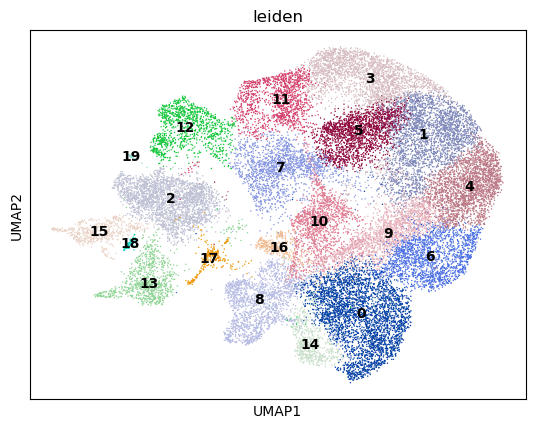

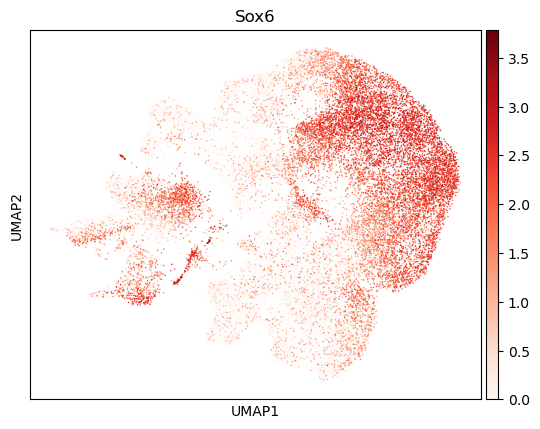

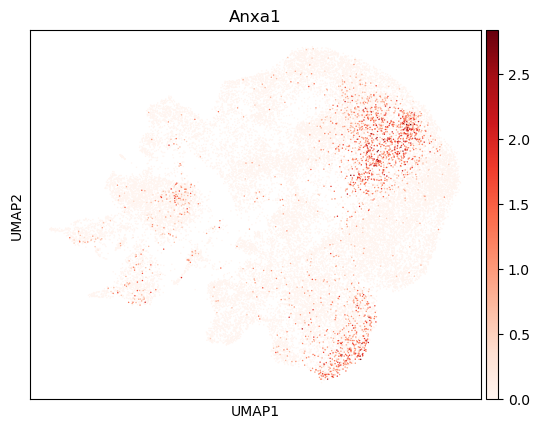

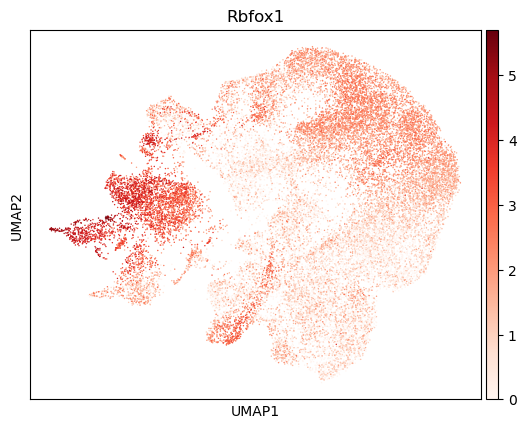

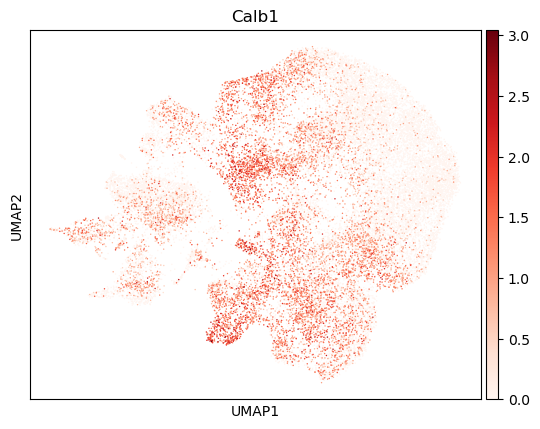

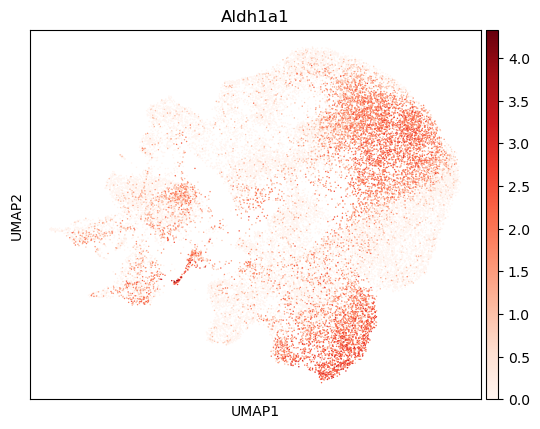

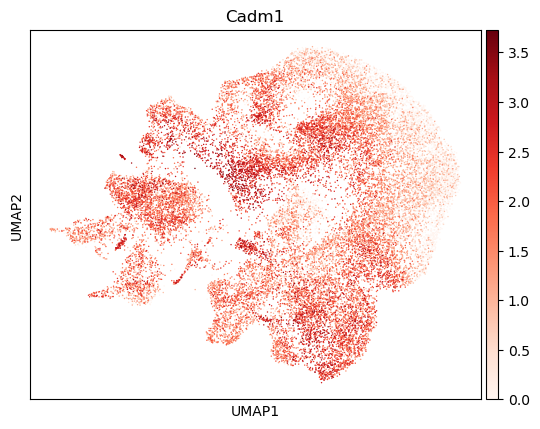

In [13]:
#plotting genes
sc.pl.umap(new_anndata, color = 'leiden', legend_loc = "on data")
sc.pl.umap(new_anndata, color="Sox6",palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(new_anndata, color="Anxa1", palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(new_anndata, color="Rbfox1", palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(new_anndata, color="Calb1", palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(new_anndata, color="Aldh1a1", palette="Set2", color_map=mpl.cm.Reds)
sc.pl.umap(new_anndata, color="Cadm1", palette="Set2", color_map=mpl.cm.Reds)

In [14]:
clusters_scanpy_leiden = new_anndata.obs["leiden"]
clusters_scanpy_leiden.to_csv('clusters_scanpy_leiden.csv')

samples_cellname=new_anndata.obs["Sample"]
samples_cellname.to_csv("samples_cellname_leiden")


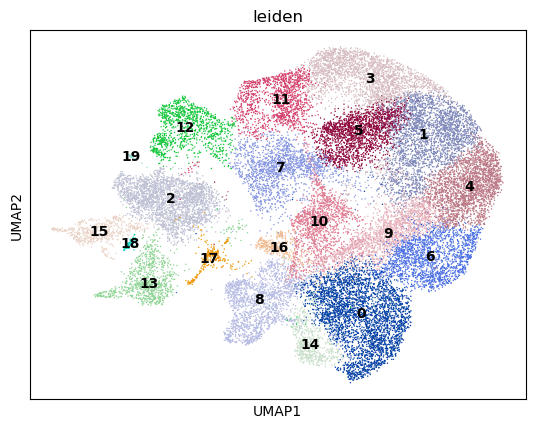

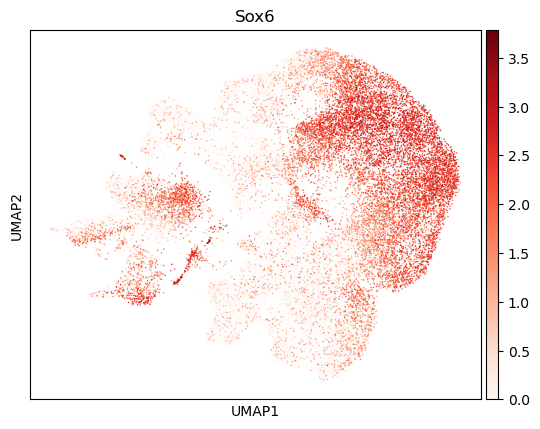

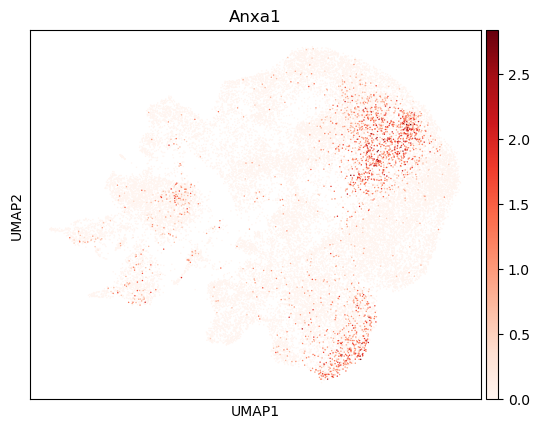

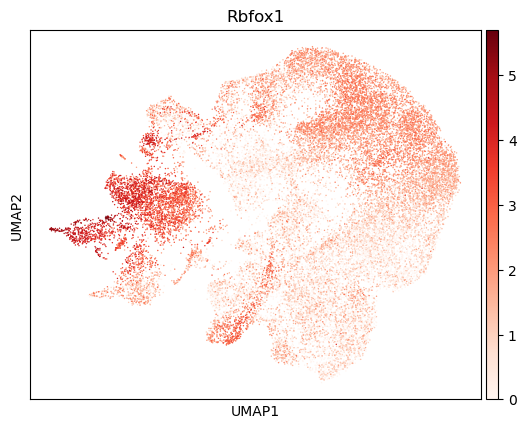

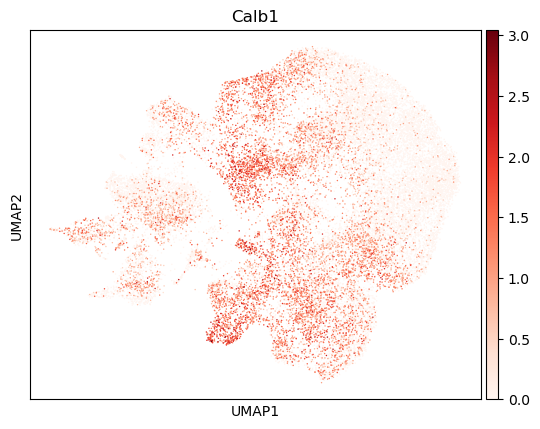

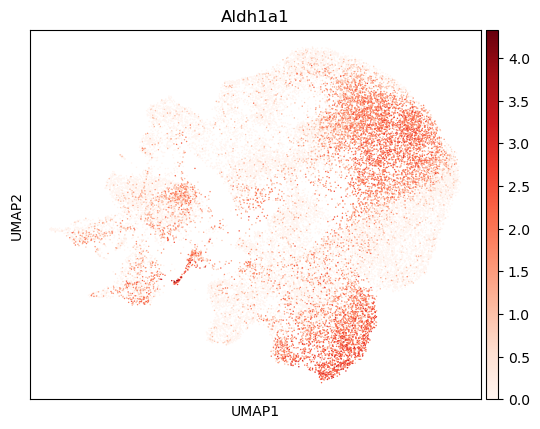

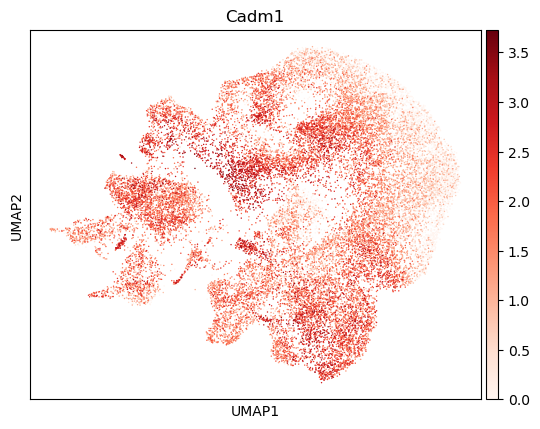

In [15]:
#plotting genes and saving
sc.pl.umap(new_anndata, color = 'leiden', legend_loc = "on data",save = 'leiden_clusters')
sc.pl.umap(new_anndata, color="Sox6",palette="Set2", color_map=mpl.cm.Reds, save = 'sox6')
sc.pl.umap(new_anndata, color="Anxa1", palette="Set2", color_map=mpl.cm.Reds, save = "anxa1")
sc.pl.umap(new_anndata, color="Rbfox1", palette="Set2", color_map=mpl.cm.Reds, save = "rbfox1")
sc.pl.umap(new_anndata, color="Calb1", palette="Set2", color_map=mpl.cm.Reds, save = "calb1")
sc.pl.umap(new_anndata, color="Aldh1a1", palette="Set2", color_map=mpl.cm.Reds, save = "aldh1a1")
sc.pl.umap(new_anndata, color="Cadm1", palette="Set2", color_map=mpl.cm.Reds, save = "cadm1")

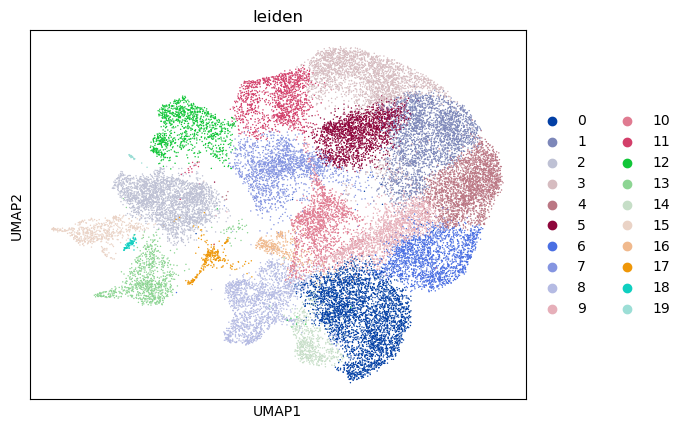

In [16]:
sc.pl.umap(new_anndata, color = 'leiden'
          )


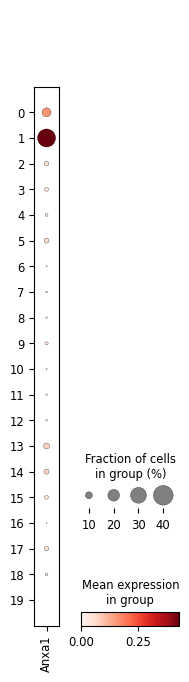

In [19]:
sc.pl.dotplot(new_anndata, 'Anxa1', groupby='leiden', dendrogram=False, save= 'anxa1_doplot' )